<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Renewable-Energy-Project/blob/main/SSP_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.eia.gov/international/data/world

In [17]:
!git clone https://github.com/Mahdi-Abdollahii/Renewable-Energy-Project.git

Cloning into 'Renewable-Energy-Project'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import csv
from scipy import stats

In [24]:
# loading data
df_Cons = pd.read_csv("/content/Renewable-Energy-Project/Data/INT-Consumption.csv", index_col= 'countries')
df_Prod = pd.read_csv("/content/Renewable-Energy-Project/Data/INT-Production.csv", index_col= 'countries')

In [44]:
#removing some countries which have no data during this period of time (2000-2021)
removed_countris_Cons = df_Cons[df_Cons['2000'] == '--'].index.tolist() + df_Cons[df_Cons['2019'] == '--'].index.tolist()
removed_countris_Cons = list(dict.fromkeys(removed_countris_Cons))

for i in removed_countris_Cons:
  df_Cons.drop(labels=i,inplace=True, axis=0)

df_Cons = df_Cons.astype(float)

In [46]:
#removing some countries which have no data during this period of time (2000-2021)
removed_countris_Prod = df_Prod[df_Prod['2000'] == '--'].index.tolist() + df_Prod[df_Prod['2019'] == '--'].index.tolist()
removed_countris_Prod = list(dict.fromkeys(removed_countris_Prod))

for i in removed_countris_Prod:
  df_Prod.drop(labels=i,inplace=True, axis=0)

df_Prod = df_Prod.astype(float)

In [49]:
df_Cons.head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
countries,,,,,,,,,,,,,,,,,,,,,
World,4.242821e+08,4.273394e+08,4.365630e+08,4.516923e+08,4.751160e+08,4.905293e+08,5.061128e+08,5.202154e+08,5.274447e+08,5.219639e+08,...,5.822123e+08,5.926091e+08,5.978325e+08,5.973536e+08,6.052358e+08,6.168634e+08,6.314726e+08,6.340298e+08,6.065223e+08,6.373276e+08
Afghanistan,2.128898e+04,1.679068e+04,1.594138e+04,1.874758e+04,1.731734e+04,2.215191e+04,2.788331e+04,3.303727e+04,5.782802e+04,9.612718e+04,...,1.452287e+05,1.204513e+05,1.022995e+05,1.178770e+05,1.075817e+05,1.064142e+05,1.220681e+05,1.091314e+05,9.861522e+04,9.768647e+04
Albania,1.034349e+05,9.803932e+04,1.061908e+05,1.197725e+05,1.277515e+05,1.260491e+05,1.186827e+05,1.021559e+05,1.115667e+05,1.215826e+05,...,1.109158e+05,1.391947e+05,1.226148e+05,1.227001e+05,1.433776e+05,1.327054e+05,1.513166e+05,1.198639e+05,1.151580e+05,1.449095e+05
Algeria,1.344290e+06,1.345807e+06,1.379438e+06,1.395967e+06,1.366730e+06,1.572525e+06,1.645559e+06,1.635069e+06,1.769772e+06,1.882352e+06,...,2.213722e+06,2.149766e+06,2.426511e+06,2.481647e+06,2.464592e+06,2.496248e+06,2.660977e+06,2.769388e+06,2.617394e+06,2.723229e+06
American Samoa,8.268582e+03,8.268582e+03,8.405959e+03,8.405959e+03,8.405959e+03,8.929446e+03,9.080819e+03,9.080819e+03,9.105698e+03,9.080819e+03,...,5.205150e+03,5.202049e+03,5.201983e+03,5.201578e+03,5.225334e+03,5.230517e+03,5.229942e+03,5.228893e+03,4.982483e+03,5.746267e+03


In [69]:
Y_cons = np.array(df_Cons[df_Cons.index == 'World'])
Y_Prod = np.array(df_Prod[df_Prod.index == 'World'])
X_year = np.array(df_Prod.columns )

In [70]:
X_year

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'], dtype=object)

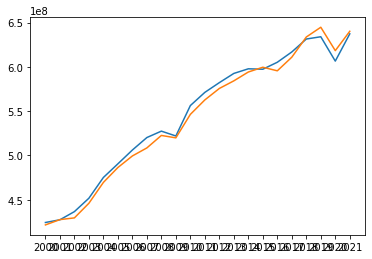

In [74]:
plt.plot(X_year,Y_cons.reshape(-1))
plt.plot(X_year,Y_Prod.reshape(-1))

In [81]:
df_Cons_asc = df_Cons.sort_values(by=['2021'],ascending=False)
df_Cons_asc_index = df_Cons_asc.index.tolist()

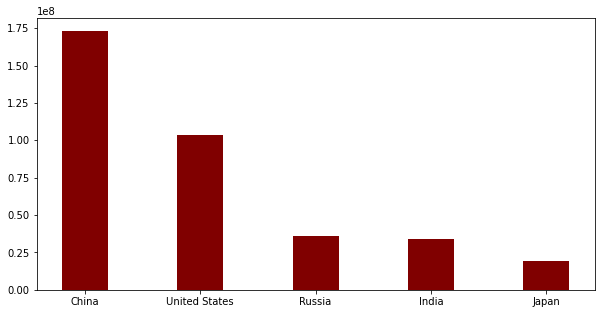

In [82]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_Cons_asc_index[1:6], df_Cons_asc['2021'][1:6], color ='maroon', width = 0.4)
plt.savefig('energy_consume.png')
 #plt.savefig('energy_consume.jpg')

In [84]:
df_Prod_asc = df_Prod.sort_values(by=['2021'],ascending=False)
df_Prod_asc_index = df_Prod_asc.index.tolist()

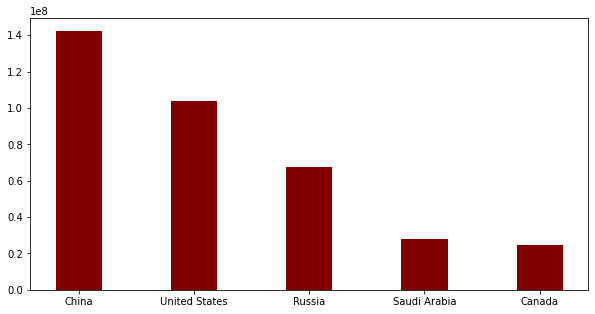

In [85]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df_Prod_asc_index[1:6], df_Prod_asc['2021'][1:6], color ='maroon', width = 0.4)
plt.savefig('energy_consume.png')
 #plt.savefig('energy_consume.jpg')